In [1]:
%reset -f
import sys
sys.path.insert(0, "..")
from wavhandler import Dataset
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report, make_scorer, log_loss
from utils_train import *
import deepdish as dd
from configs import DatasetConfiguration
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

seed = 42
np.random.seed(seed=seed)

splitting = 'random'
data_setting = 'raw'
model_setting = 'conv1d'

assert splitting in ['random','randomcv','custom'], "Wrong splitting method given."
assert data_setting in ['raw','stft','psd_dB', 'cwt'], "Wrong data settting given."
assert model_setting in ['wavenet','lstm','gru','conv1d','conv1d_psd',
                        'DenseNet121','DenseNet169','DenseNet201',
                        'InceptionResNetV2','VGG16','VGG19',
                        'dl4tsc_fcn','dl4tsc_res', 'tsc_res_baseline',
                        'tsc_fcn_baseline', 'conv1d_baseline', 'dl4tsc_inc'], "Wrong model setting given"

In [2]:
dataset = Dataset('Pcfruit_sensor49')
dataset.read(loadmat=False)
dataset.make_array(setting='raw');
dataset.make_array(setting='psd_dB');

X = dataset.filenames.tolist()
y = dataset.y.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

Species: all.
Read 10264 filenames in 0.03 seconds.


In [3]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)
X_sens49, y_sens49 = X, y

In [4]:
X_train, X_test, X_val, y_train, y_test, y_val = train_test_val_split(X_sens49, y_sens49, random_state=42, verbose=1, test_size=0.1, val_size=0.2)

In [5]:
using_conv2d = False
traincf = TrainConfiguration(dataset=dataset, setting=data_setting, model_name=f'swdmel_{splitting}_{data_setting}_{model_setting}_weights')
model = ModelConfiguration(model_setting=model_setting, data_setting=data_setting, target_names=traincf.target_names).config

############ INPUT SHAPE:(5000, 1)


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
train_stats = calculate_train_statistics(X_train=X_train, setting=data_setting)

In [8]:
h = model.fit_generator(train_generator(X_train, y_train, 
                                    batch_size=traincf.batch_size,
                                    target_names=traincf.target_names,
                                    setting=traincf.setting,
                                    preprocessing_train_stats=train_stats,
                                    using_conv2d=using_conv2d),
                    steps_per_epoch = int(math.ceil(float(len(X_train)) / float(traincf.batch_size))),
                    epochs = traincf.epochs,
                    validation_data = valid_generator(X_val, y_val,
                                                        batch_size=traincf.batch_size,
                                                        target_names=traincf.target_names,
                                                        setting=traincf.setting,
                                                        preprocessing_train_stats=train_stats,
                                                        using_conv2d=using_conv2d),
                    validation_steps=int(math.ceil(float(len(X_test))/float(traincf.batch_size))),
                    callbacks=traincf.callbacks_list)

Epoch 1/100
230/231 [============================>.] - ETA: 0s - loss: 0.4080 - accuracy: 0.8140
Epoch 00001: val_loss improved from inf to 1.00918, saving model to /home/kalfasyan/projects/wingbeat_frequencies/temp_data/swdmel_random_raw_conv1d_weights.h5
231/231 [==============================] - 19s 81ms/step - loss: 0.4083 - accuracy: 0.8140 - val_loss: 1.0092 - val_accuracy: 0.1866
Epoch 2/100
230/231 [============================>.] - ETA: 0s - loss: 0.2841 - accuracy: 0.8723
Epoch 00002: val_loss did not improve from 1.00918
231/231 [==============================] - 19s 82ms/step - loss: 0.2844 - accuracy: 0.8725 - val_loss: 9.3157 - val_accuracy: 0.1937
Epoch 3/100
230/231 [============================>.] - ETA: 0s - loss: 0.2221 - accuracy: 0.9082
Epoch 00003: val_loss did not improve from 1.00918
231/231 [==============================] - 17s 72ms/step - loss: 0.2222 - accuracy: 0.9082 - val_loss: 8.1623 - val_accuracy: 0.2013
Epoch 4/100
230/231 [===========================

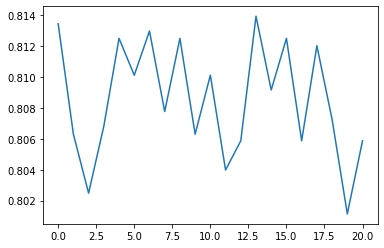

In [9]:
plt.plot(h.history['val_accuracy'])

In [6]:
X_test

['/home/kalfasyan/data/insects/Pcfruit_sensor49/D. melanogaster/newrecords_23_March/F200314_141906_125_G_050_T_25.9_H_40.4.wav',
 '/home/kalfasyan/data/insects/Pcfruit_sensor49/D. melanogaster/newrecords_23_March/F200310_123153_228_G_050_T_25.9_H_44.3.wav',
 '/home/kalfasyan/data/insects/Pcfruit_sensor49/D. melanogaster/newrecords_23_March/F200313_010147_180_G_050_T_25.9_H_39.4.wav',
 '/home/kalfasyan/data/insects/Pcfruit_sensor49/D. melanogaster/F200131_185847_161_G_050_T_30.0_H_74.1.wav',
 '/home/kalfasyan/data/insects/Pcfruit_sensor49/D. melanogaster/D_20_01_04_12_51_51/F200105_162618_112_G_050_T_28.7_H_42.8.wav',
 '/home/kalfasyan/data/insects/Pcfruit_sensor49/D. melanogaster/newrecords_23_March/F200305_145225_088_G_050_T_25.9_H_48.7.wav',
 '/home/kalfasyan/data/insects/Pcfruit_sensor49/D. melanogaster/D_20_01_04_12_51_51/F200106_105241_142_G_050_T_28.0_H_39.4.wav',
 '/home/kalfasyan/data/insects/Pcfruit_sensor49/D. suzukii/F200213_031019_189_G_050_T_30.0_H_49.7.wav',
 '/home/kalfa